While it is not required and there is nothing to turn in for this section, we strongly recommend that you go through the tutorial here to get familiar with the data. In a new notebook, run the following in the first cell. (The first line makes plots show up directly in your notebook.)

In [39]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


Identify the path to fruit images.npy and fruit labels.npy in the file down- loaded (it should be stored in the directory datasets). The first file contains a 3-D uint8 NumPy array with shape [72000, 28, 28]. This corresponds to 72000 images, each 28 pixels x 28 pixels. The second file contains a 1-D uint8 array with shape [72000]. This corresponds to 72000 labels, where the i-th label is associated with the i-th image.

Load the images and labels:

In [2]:
images = np.load("datasets/fruit_images.npy")
labels = np.load("datasets/fruit_labels.npy")

Separate out class 0 and visualize the first image:

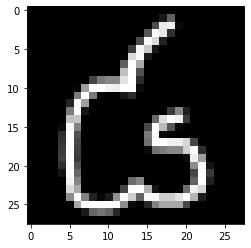

In [3]:
class_0_images = images[labels == 0]
plt.imshow(class_0_images[0])
plt.set_cmap('gray')

Repeat this for each of the classes (0-5). Which integer is associated with the apple class? The banana class? What about for grapes, pineapples, strawberries, watermelons?

Apple:          0
Banana:         1
Grape:          2
Pineapple:      3
Strawberry:     4
Watermelon:     5

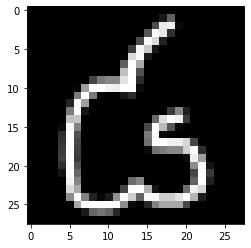

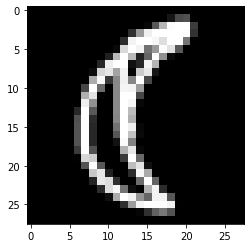

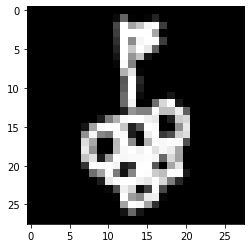

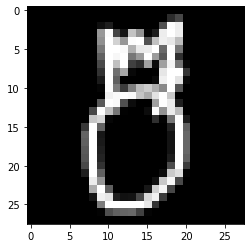

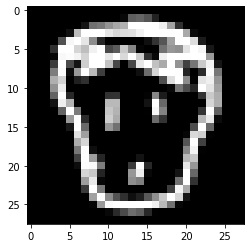

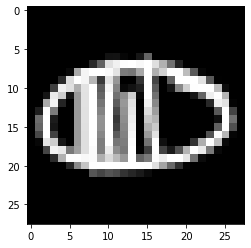

In [4]:
for i in range(6):
    class_images = images[labels == i]
    plt.figure()
    plt.imshow(class_images[0])
    plt.set_cmap('gray')

For most of this project, you will treat each image as a vector rather than as a matrix. As you saw above, your images are currently stored in an array of shape (num images, height, width). Reshape the inputs to have shape num images, height * width.

In [5]:
flattened = np.array([images[i].flatten() for i in range(images.shape[0])])

Print the new shape of images.

In [9]:
print(flattened.shape)

(72000, 784)
6


Plot the first 5 flattened vectors (corresponding to the first 5 images) using plt.plot. (This should result in 5 different lines on the plot. This is not intended to give you much information, but is included simply to emphasize the fact that your classifiers here will be taking in flattened images as input.)

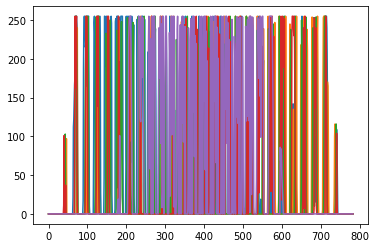

In [26]:
for i in range(5):
    plt.plot(flattened[i])

Finding accuracy of majority vote of random classifiers:

In [37]:
import random
from statistics import mode

accuracies = []
for i in range(10000):
    vote = [0] * 6
    for j in range(100):
        vote[random.randint(0,5)] += 1
    accuracies.append(vote.index(max(vote)) == 3)
print(sum(accuracies)/len(accuracies))

0.1566


Include a plot of training accuracy and validation accuracy as a function of epoch step for your best settings (replace blank.png with your file name in the box). You can create a python notebook to aid in plotting these figures.

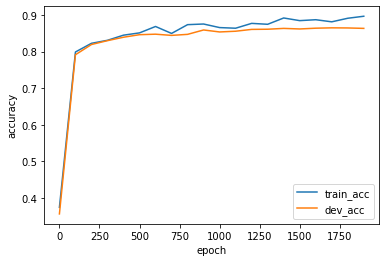

In [48]:
epochs, train_acc, dev_acc = np.loadtxt('densenet_epoch_output.csv', delimiter=',', unpack=True)

plt.plot(epochs, train_acc, label='train_acc')
plt.plot(epochs, dev_acc, label='dev_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

100


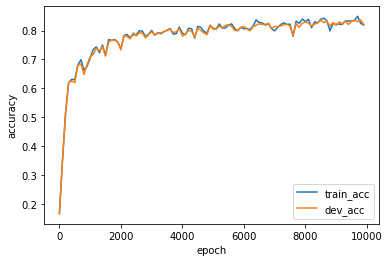

In [50]:
epochs, train_acc, dev_acc = np.loadtxt('convnet_epoch_output.csv', delimiter=',', unpack=True)

plt.plot(epochs, train_acc, label='train_acc')
plt.plot(epochs, dev_acc, label='dev_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()